<a href="https://colab.research.google.com/github/Hongawy/Computer_Vision_Projects/blob/main/Character_Detector_from_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**:

Character detector which extracts printed or handwritten text from an image.

## 0. Download and install required libraries

In [ ]:
!pip install torch torchvision torchaudio
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. Import required dependencies

In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

# 2. Handling Single word

In [ ]:
IMAGE_PATH="Hawaii.jpg"
reader=easyocr.Reader(['en'],gpu=False)
result = reader.readtext(IMAGE_PATH)
result

[([[3, 41], [689, 41], [689, 293], [3, 293]], 'HAWAII', 0.9861000396834472)]

## 2.1 Using the easyocr library to detect the word

In [ ]:
top_left = result[0][0][0]
bottom_right =result[0][0][2]
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

## 2.2 Plotting the result

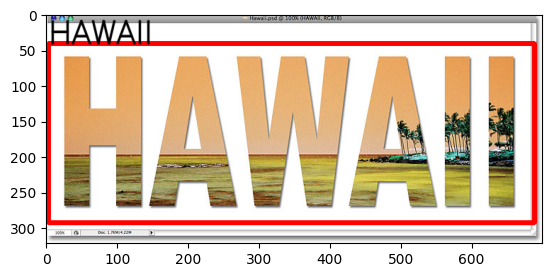

In [ ]:
img=cv2.imread(IMAGE_PATH)
img=cv2.rectangle(img,top_left,bottom_right,(255,0,0),5)
img=cv2.putText(img,text,top_left,font,1.5,(0,0,0),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

#3. Handling Multiple Lines
## 3.1 Using the easyocr library to detect the word


In [ ]:
IMAGE_PATH="OOS.jpeg"
reader=easyocr.Reader(['en'],gpu=False)
result = reader.readtext(IMAGE_PATH)
result

[([[164, 79], [675, 79], [675, 211], [164, 211]], 'SORRY', 0.9990287593356681),
 ([[146, 252], [692, 252], [692, 374], [146, 374]],
  'OUT OF',
  0.8929883567104914),
 ([[106, 366], [740, 366], [740, 492], [106, 492]],
  'SERVICE',
  0.6757740926446881),
 ([[72, 503], [730, 503], [730, 534], [72, 534]],
  'Customize this and other Out of Order templates for free at EDIT.org',
  0.6944818952232107),
 ([[750, 508], [788, 508], [788, 534], [750, 534]],
  'YoGo',
  0.16933977603912354)]

## 3.2 Plotting the result

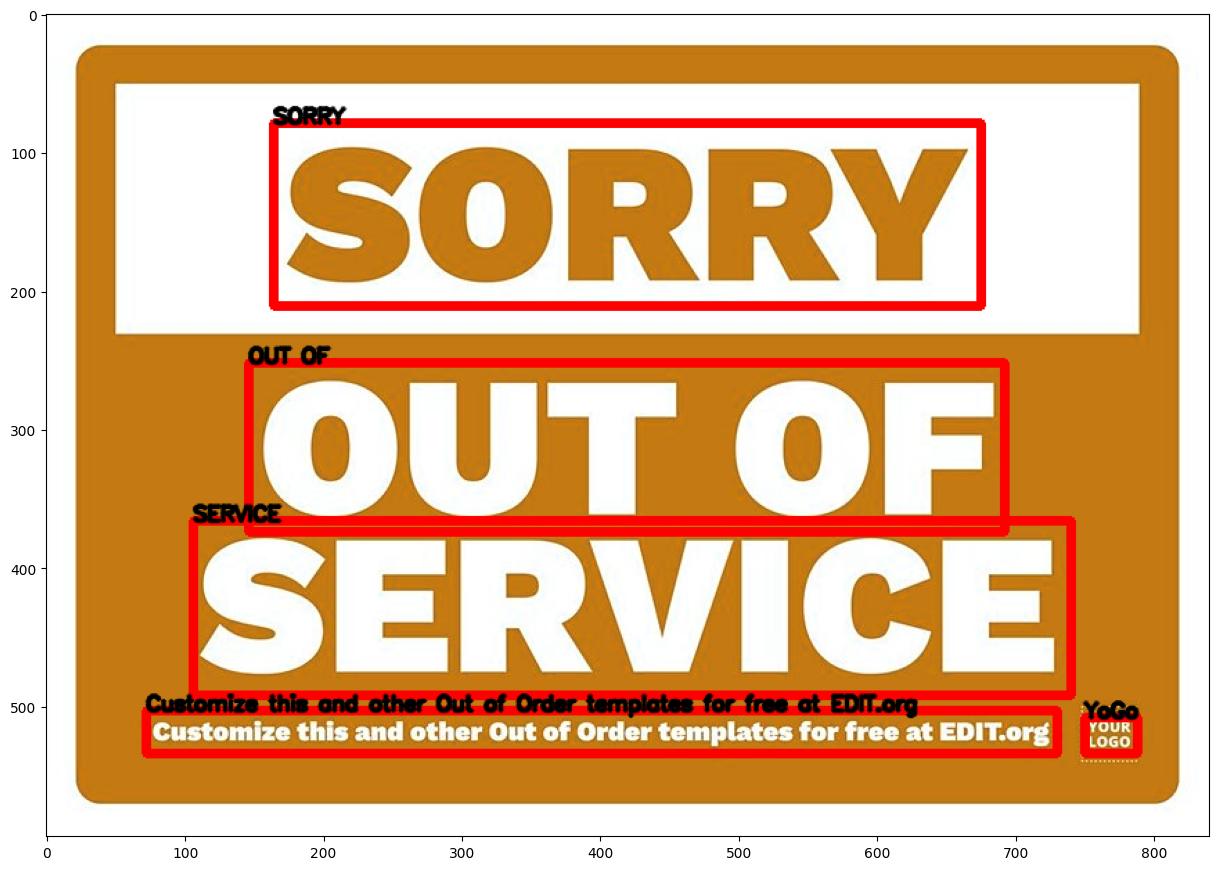

In [ ]:
img=cv2.imread(IMAGE_PATH)
for detection in result:
  top_left=tuple([int(val)for val in detection[0][0]])
  bottom_right=tuple([int(val)for val in detection[0][2]])
  text=detection[1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  img=cv2.rectangle(img,top_left,bottom_right,(255,0,0),5)
  img=cv2.putText(img,text,top_left,font,0.5,(0,0,0),2,cv2.LINE_AA)

plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()